In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import symbols, lambdify

In [4]:
def interpolacao_newton(x_vals, y_vals):
    """
    Realiza interpolação por diferenças divididas de Newton.
    
    Retorna:
    - Polinômio interpolador (SymPy)
    - Tabela de diferenças divididas
    - Função lambda para avaliação numérica
    """
    n = len(x_vals)
    # Tabela de diferenças divididas (matriz triangular inferior)
    dif_div = np.zeros((n, n))
    dif_div[:, 0] = y_vals  # Primeira coluna são os y's
    
    for j in range(1, n):  # Colunas (ordens)
        for i in range(j, n):  # Linhas
            dif_div[i, j] = (dif_div[i, j-1] - dif_div[i-1, j-1]) / (x_vals[i] - x_vals[i-j])
    
    # Construção do polinômio
    x = symbols('x')
    P = dif_div[0, 0]  # Termo constante
    produto = 1
    
    for k in range(1, n):
        produto *= (x - x_vals[k-1])
        P += dif_div[k, k] * produto
    
    P = sp.simplify(P)
    f_newton = lambdify(x, P, 'numpy')
    
    return P, dif_div, f_newton

Interpolação de Newton por diferenças divididas

Polinômio interpolador de Newton:
                    5                     4                     3              ↪
- 279.342101916116⋅x  + 665.819488290706⋅x  - 610.424883656793⋅x  + 267.066685 ↪

↪         2                                        
↪ 477048⋅x  - 54.8140142021722⋅x + 4.34761278195489

Tabela de diferenças divididas:
Ordem | Dif. 0 | Dif. 1 | Dif. 2 | Dif. 3 | Dif. 4 | Dif. 5
-----------------------------------------------------------
x0   | 0.1600 |    -    |    -    |    -    |    -    |    -   
x1   | 0.2200 | 0.4286 |    -    |    -    |    -    |    -   
x2   | 0.2700 | 0.8333 | 2.0238 |    -    |    -    |    -   
x3   | 0.2900 | 0.1667 | -3.7037 | -17.8985 |    -    |    -   
x4   | 0.3200 | 0.3750 | 1.0417 | 18.2514 | 90.3748 |    -   
x5   | 0.3700 | 0.4167 | 0.2083 | -2.6042 | -54.8831 | -279.3421
Para x = 0.4700, y estimado = 0.2872


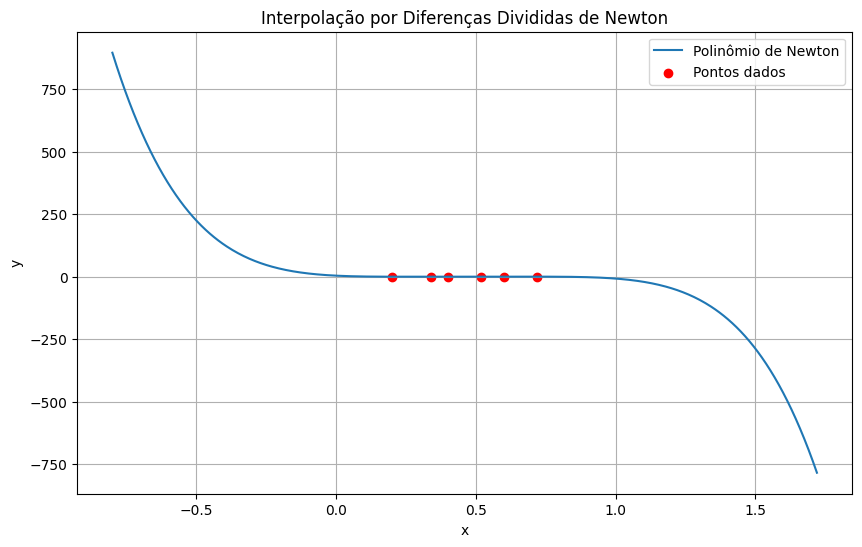

In [5]:
# Entrada de dados
print("Interpolação de Newton por diferenças divididas")
n = int(input("Digite o número de pontos (n): "))
x_vals = []
y_vals = []

for i in range(n):
    x = float(input(f"x{i}: "))
    y = float(input(f"y{i}: "))
    x_vals.append(x)
    y_vals.append(y)

P, tabela_dif_div, f_newton = interpolacao_newton(x_vals, y_vals)

# Exibição do polinômio
print("\nPolinômio interpolador de Newton:")
print(sp.pretty(P, use_unicode=True))

# Tabela de diferenças divididas
print("\nTabela de diferenças divididas:")
header = "Ordem | " + " | ".join(f"Dif. {i}" for i in range(n))
print(header)
print("-" * len(header))
for i in range(n):
    linha = f"x{i}   | " + " | ".join(f"{tabela_dif_div[i, j]:.4f}" if j <= i else "   -   " for j in range(n))
    print(linha)

# Estimativa para um x qualquer
while True:
    entrada = input("\nDigite um valor de x para estimar y (ou 'sair'): ")
    if entrada.lower() == 'sair':
        break
    try:
        x_input = float(entrada)
        y_estimado = f_newton(x_input)
        print(f"Para x = {x_input:.4f}, y estimado = {y_estimado:.4f}")
    except ValueError:
        print("Entrada inválida. Digite um número ou 'sair'.")

# Gráfico
x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
y_plot = f_newton(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Polinômio de Newton')
plt.scatter(x_vals, y_vals, color='red', label='Pontos dados')
plt.title('Interpolação por Diferenças Divididas de Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()